# La régression linéaire

Cheryl Kouadio  
2024-06-14

# Introduction

La régression linéaire est une méthode d’apprentissage supervisé qui
vise à évaluer, lorsqu’il existe, la relation linéaire entre une
variable d’intérêt et des variables explicatives.

Pour un ensemble $(y_i,x_i)$ de données constitué de n échantillons iid
(indépendant et identiquement distribué), le modèle de regression
linéaire s’écrit comme suit :

où $y_i$ est la variable cible, $x_{i1}, \dots, x_{ip}$ sont les
variables explicatives et $\xi_i$ est l’erreur, l’information que les
autres variables explicatives ne donnent pas.

L’hypothèse fondamentale de la régression linéaire est l’existence d’une
relation linéaire entre la variable cible et les variables explicatives.
Pour s’assurer de la pertinence de cette hypothèse avant de procéder à
la régression linéaire (à l’aide de visualisation ou de tests- spearman,
pearson, etc.)

L’hypothèse de rang plein est la seconde plus grande hypothèse, elle
stipule que les variables explicatives ne soient pas corrélées entre
elles. Cette condition est nécessaire pour garantir l’unicité des
estimations des paramètres du modèle et ainsi l’identifiabilité du
modèle étudié

Par ailleurs pour que les estimations des paramètres du modèle linéaire
soient fiables, les erreurs du modèle, représentées par $\xi_i$, doivent
répondre à plusieurs critères :

-   **Erreurs centrées** : La moyenne attendue des erreurs doit être
    nulle, soit $E[\xi_i] = 0$. Cela signifie que le modèle ne présente
    pas de biais systématique dans les prédictions.
-   **Homoscédasticité** : La variance des erreurs doit être constante
    pour toutes les observations, exprimée par $V[\xi_i] = \sigma^2$.
    Cette propriété garantit que la précision des estimations est
    uniforme à travers la gamme des valeurs prédites.
-   **Décorrélation des erreurs** : Les erreurs doivent être
    mutuellement indépendantes, c’est-à-dire que la covariance entre
    toute paire d’erreurs est nulle, $Cov(\xi_i, \xi_j) = 0$ pour
    $1\leq i \neq j \leq n$. Cette condition est essentielle pour éviter
    les biais dans les estimations des paramètres et pour que les tests
    statistiques sur les coefficients soient valides.

Il est courant d’observer une hypothèse supplémentaire sur la loi des
erreurs. En effet, les erreurs sont souvent supposées suivre une loi
normale, c’est à dire que $\xi_i \sim N(0, \sigma^2)$. Celà nous permet
de faire des inférences sur les paramètres du modèle et de construire
des intervalles de confiance.

## Estimation des paramètres

Toutes les hypothèses étant respectées, et sous reserve qu’il n’y a pas
de multicolinéarité entre les variables explicatives du modèles
i.e. $X^T X$ est inversible(l’hypothèse de rang plein est respectée),
l’estimateur $\hat \beta$ de $\beta$ obtenus par moindre carré ordinaire
est donné par la formule suivante :

$$
\hat \beta = (X^T X)^{-1} X^T y
$$

De ce fait, nous pouvons calculer la variance de cet estimateur : $$
VAR(\hat \beta) = \sigma^2 (X^T X)^{-1}
$$

D’après le théorème de Gauss-Markov, l’estimateur $\hat \beta$ est le
meilleur estimateur linéaire non biaisé des paramètres du modèle. En
effet, il est l’estimateur avec la plus petite variance, parmi les
estimateurs linéaires sans biais qui existent. Cet estimateur est ainsi
appelé BLUE (Best Linear Unbiased Estimator).

Lorsque les erreurs sont supposées suivre une loi normale, l’estimateur
$\hat \beta$ est également l’estimateur du maximum de vraisemblance des
paramètres du modèle et suit une loi normale
$\hat \beta \sim N(\beta, \sigma^2 (X^T X)^{-1})$.

L’estimateur de la variance des erreurs $\sigma^2$ est donné par :

$$
\hat \sigma^2 = \frac{1}{n-p} \sum_{i=1}^{n} \hat \xi_i^2 = \frac{SCR}{n-p}
$$ SCR = somme des carrés des résidus.

## Evaluation du modèle

Dans l’optique de mesurer la qualité du modèle, plusieurs métriques sont
utilisées : le R², le R² ajusté, l’erreur quadratique moyenne (MSE), des
critères d’informations (AIC, BIC) etc.

### 1. Coefficient de détermination R²

Le coefficient de détermination $R^2$ est une mesure de la proportion de
la variance de la variable cible qui est expliquée par le modèle. Il est
défini comme suit :

$$
R^2 = 1 - \frac{SCR}{SCT}
$$ avec SCT qui est la somme des carrés totaux
($SCT = \sum_{i=1}^{n} (y_i - \bar y)^2$) et SCR qui est la somme des
carrés des résidus.

Néanmoins, le $R^2$ n’est pas une mesure parfaite de la qualité du
modèle. En effet, il augmente avec le nombre de variables explicatives,
même si ces variables n’ont pas de lien avec la variable cible. Pour
pallier à ce problème, le $R^2$ ajusté est utilisé. Il est défini comme
suit :

$$
R^2_a = 1 - \frac{SCR/(n-p)}{SCT/(n-1)}
$$

### 2. Critères d’information (AIC, BIC)

Les critères AIC et BIC sont des critères d’information qui servent à
mesurer l’attache du modèle aux données que nous avons ajustés avec une
pénalité lié soit aux nombres de variables inclus dans le modèles et/ou
la taille de l’échantillon étudié. De fait, plus l’AIC ou le BIC est
faible, meilleur est le modèle, car cela signifie qu’il a le modèle
choisie a une probabilité plus élevée d’être correct et une complexité
plus faible.

Mathématiquement,

$$
\text{AIC} = - 2 \log (l(\hat{\theta})) - 2\times p, \quad p=|\hat \theta|
$$

$$
\text{BIC} = - 2 \log (l(\hat{\theta})) - \log (n) \times p
$$

Maintenant que ces équations sont visibles, nous constatons que le BIC
est un critère plus parcimonieux que le critère AIC en raison de la
pénalisation qui est plus élevé lorsque $\log(n) \geq 2$, i.e il y a
environ 8 observations dans l’échantillon sélectionné.

# Application

## 1. Simulation des données

Pour évaluer l’intérêt de la regréssion linéaire, nous allons simuler un
échantillon de taille n=200, où la variable cible Y est une fonction
linéaire de la variable explicative X. La vraie relation est donnée par
$Y = 2 + 3X + \epsilon$, où $\epsilon \sim N(0, 1.6)$. De fait le modèle
linéaire est adéquat.

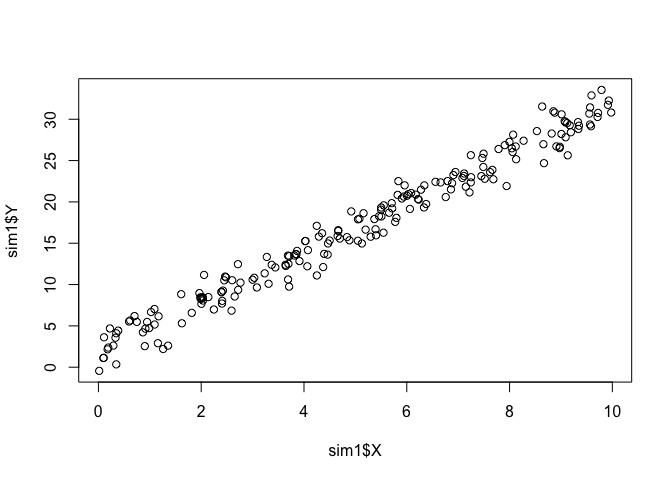

In [ ]:
set.seed(314)
n<-200
X<-runif(n,0,10)

sigma2<-1.6
epsilon<-rnorm(n,0,sigma2)
Y<- 2 + 3*X + epsilon

sim1<-data.frame(X,Y)

plot(sim1$X,sim1$Y)

En ajustant un modèle linéaire simple à nos données, nous obtenons une
estimation des paramètres $\hat \beta_0 = 1.92$ et
$\hat \beta_1 = 2.98$. Les erreurs du modèle suivent une loi normale
avec une variance $\hat \sigma^2 = 1.45$.

In [ ]:
sim1_lm<-lm(Y~X,data=sim1)
summary(sim1_lm)


Call:
lm(formula = Y ~ X, data = sim1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6505 -0.9901  0.0830  0.9899  3.9100 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.92097    0.20774   9.247   <2e-16 ***
X            2.97748    0.03582  83.117   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.447 on 198 degrees of freedom
Multiple R-squared:  0.9721,    Adjusted R-squared:  0.972 
F-statistic:  6908 on 1 and 198 DF,  p-value: < 2.2e-16

## 2. Evaluation du modèle

### 2.1. Hypothèses sur les erreurs et l’existence d’une relation linéaire

Pour évaluer la qualité du modèle, nous allons tracer les résidus
studentisés en fonction des valeurs ajustées. Les résidus studentisés
sont les résidus divisés par l’écart-type des erreurs.

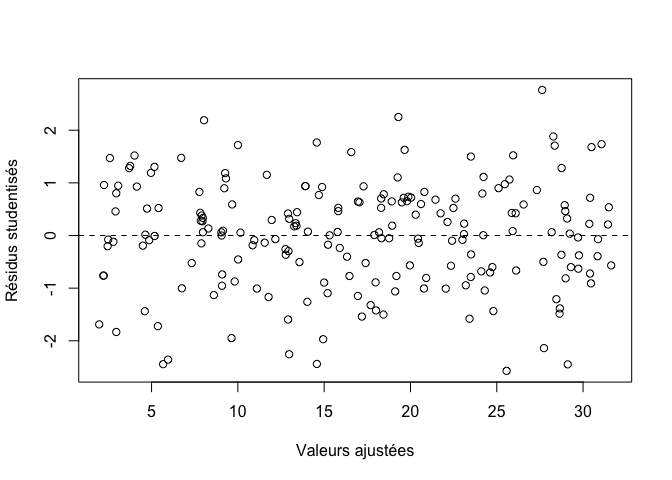

In [ ]:
plot(sim1_lm$fitted.values,rstudent(sim1_lm),xlab="Valeurs ajustées", ylab="Résidus studentisés")
abline(h=0,lty=2)

Le plot ci dessus nous montre que lorsque les réponses prédites par le
modèle (fitted values) augmentent, les résidus restent globalement
uniformément distribués de part et d’autre de 0. Cela montre, qu’en
moyenne, la droite de régression, est bien adaptée aux données, et donc
que l’hypothèse de linéarité est acceptable.

Si l’on observait une forme de trompette, celà reviendrait à soulever
une question sur l’hétéroscédascité des résidus, tandis qu’une forme de
banane revèle plutôt une relation de non-linéarité.

Lorsque le nuage de point n’a pas de structure particulière, a priori
l’hypothèse d’homoscédascticité n’est pas remise en question, comme cela
semble être le cas ici. Attention : ces principes peuvent parfois être
mis en défaut et il vaut toujours mieux réaliser plusieurs contrôles
différents.

Pour vérifier l’hypothèse d’homoscédasticité, nouspouvons également
utiliser le test de Breusch-Pagan. Ce test est basé sur la régression
des carrés des résidus sur les variables explicatives. Si le test est
significatif, l’hypothèse d’homoscédasticité est rejetée.

In [ ]:
#library(leaps)
library(car)

Loading required package: carData

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.0003134709, Df = 1, p = 0.98587

Pour tester l’hypothèse de non corrélation des résidus, nous pouvons
utiliser le test de Durbin-Watson. Ce test est basé sur
l’autocorrélation des résidus. Si le test est significatif, l’hypothèse
de non corrélation des résidus est rejetée.

In [ ]:
durbinWatsonTest(sim1_lm)

 lag Autocorrelation D-W Statistic p-value
   1      0.02199557      1.939509    0.63
 Alternative hypothesis: rho != 0

En ce qui concerne l’hypothèse de normalité des résidus, nous pouvons
utiliser le test de Shapiro-Wilk. Ce test est basé sur la comparaison
des résidus avec une loi normale. Si le test est significatif,
l’hypothèse de normalité des résidus est rejetée.

In [ ]:
shapiro.test(sim1_lm$residuals)


    Shapiro-Wilk normality test

data:  sim1_lm$residuals
W = 0.99131, p-value = 0.2749

La p-valeur du test de Shapiro-Wilk est de 0.27, ce qui signifie que
l’hypothèse de normalité des résidus n’est pas rejetée.

### 2.2. Qualité du modèle

Pour évaluer la qualité du modèle, nous allons calculer le coefficient
de détermination $R^2$ et le $R^2$ ajusté.

In [ ]:
(R2<-summary(sim1_lm)$r.squared)

[1] 0.9721382

[1] 0.9719975

[1] 719.3729

[1] 729.2678

Nous obtenons un $R^2$ et un $R^2$ ajusté de 0.97. Cela signifie que 97%
de la variance de la variable cible est expliquée par le modèle. Notre
modèle de régression linéaire est bien ajusté à nos données.